In [20]:
## importing the required libraries


import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
# Load the data

#df = pd.read_csv('/Users/abuqais/Desktop/UON/ML/student+performance/student/student-mat.csv', sep=';')

df=pd.read_csv('/Users/abuqais/Desktop/UON/ML/Concrete_Data.csv')
y = df['Concrete compressive strength(MPa, megapascals) ']
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [24]:
# Separate features and target
X = df.drop('Concrete compressive strength(MPa, megapascals) ', axis=1)
X

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [26]:
# Initializing KFold 
kf = KFold(n_splits=5, shuffle=True, random_state=10)
model = LinearRegression()

In [28]:
# Lists to store performance metrics
mse_scores = []
r2_scores = []

# Perform k-fold cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    # Split data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train and predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    mse_scores.append(mse)
    r2_scores.append(r2)
    

    
    print(f"\nFold {fold+1} Results:")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {np.sqrt(mse):.2f}")
    print(f"R2 Score: {r2:.2f}")


# Calculate average metrics
print("\nAverage Results:")
print(f"Average MSE: {np.mean(mse_scores):.2f}")
print(f"Average RMSE: {np.sqrt(np.mean(mse_scores)):.2f}")
print(f"Average R2 Score: {np.mean(r2_scores):.2f}")


Fold 1 Results:
MSE: 113.61
RMSE: 10.66
R2 Score: 0.59

Fold 2 Results:
MSE: 94.05
RMSE: 9.70
R2 Score: 0.65

Fold 3 Results:
MSE: 124.18
RMSE: 11.14
R2 Score: 0.55

Fold 4 Results:
MSE: 100.07
RMSE: 10.00
R2 Score: 0.65

Fold 5 Results:
MSE: 112.35
RMSE: 10.60
R2 Score: 0.60

Average Results:
Average MSE: 108.85
Average RMSE: 10.43
Average R2 Score: 0.61


In [165]:
#df.describe()

In [189]:
#df.info()

In [187]:
#print(df.columns)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Read the data
df = pd.read_csv('Concrete_Data.csv')

# Separate features and target
X = df.drop('Concrete compressive strength(MPa, megapascals) ', axis=1)
y = df['Concrete compressive strength(MPa, megapascals) ']

# Initialize model
model = LinearRegression()

# Perform 5-fold cross validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')
mse_scores = -cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(mse_scores)

# Print detailed scores for each fold
print("Detailed Cross-Validation Scores:")
for fold, (r2, mse, rmse) in enumerate(zip(cv_scores, mse_scores, rmse_scores), 1):
    print(f"\nFold {fold}:")
    print(f"R² Score: {r2:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")

# Print average scores
print("\nAverage Scores:")
print(f"Mean R² Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
print(f"Mean MSE: {mse_scores.mean():.4f} (+/- {mse_scores.std() * 2:.4f})")
print(f"Mean RMSE: {rmse_scores.mean():.4f} (+/- {rmse_scores.std() * 2:.4f})")

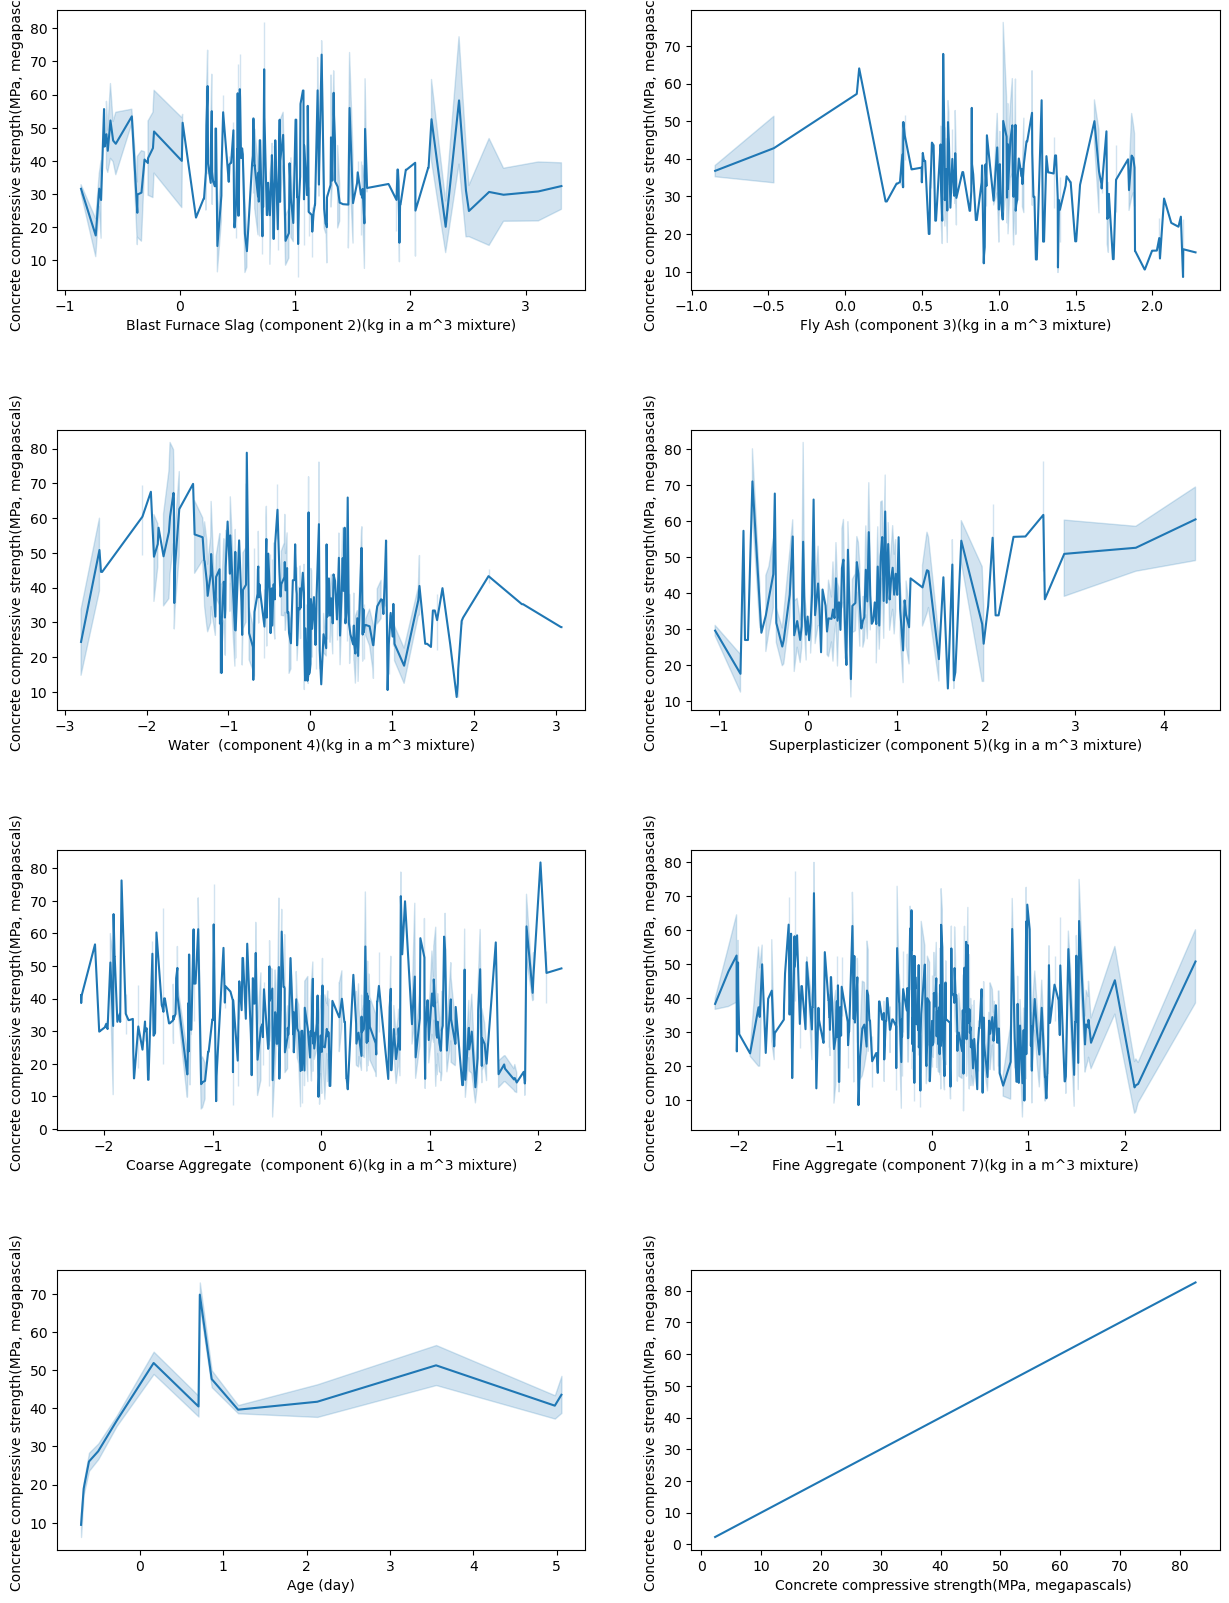

In [176]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,20))
fig.subplots_adjust(hspace =.5, wspace=.2)
axes = axes.ravel()
for i, col in enumerate(normalised_df.columns[1:]):
    _= sns.lineplot(y=normalised_df[output_column], x=col, data=normalised_df, ax=axes[i])

In [157]:
# Prepare features (X) and target variable (y)



# training (80%) and testing (20%)
kf = KFold(n_splits=5, shuffle=True, random_state=42)


In [159]:

# Create and train the model
model = LinearRegression()
mse_scores = []
r2_scores = []
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    # Split data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train and predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    mse_scores.append(mse)
    r2_scores.append(r2)

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [129]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print model performance
print("\n=== Model Performance ===")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")
print(f"Root Mean Squared Error: {np.sqrt(mse):.2f}")



=== Model Performance ===
Mean Squared Error: 134.83
R-squared Score: 0.55
Root Mean Squared Error: 11.61


In [133]:

# feature importance
coefficients = pd.DataFrame({
    'Feature': X,
    'Coefficient': model.coef_
})
coefficients = coefficients.sort_values('Coefficient', ascending=False)
print("\n=== Feature Coefficients ===")
print(coefficients)


ValueError: Per-column arrays must each be 1-dimensional

Text(0.5, 1.0, 'Actual vs Predicted Final Grades')

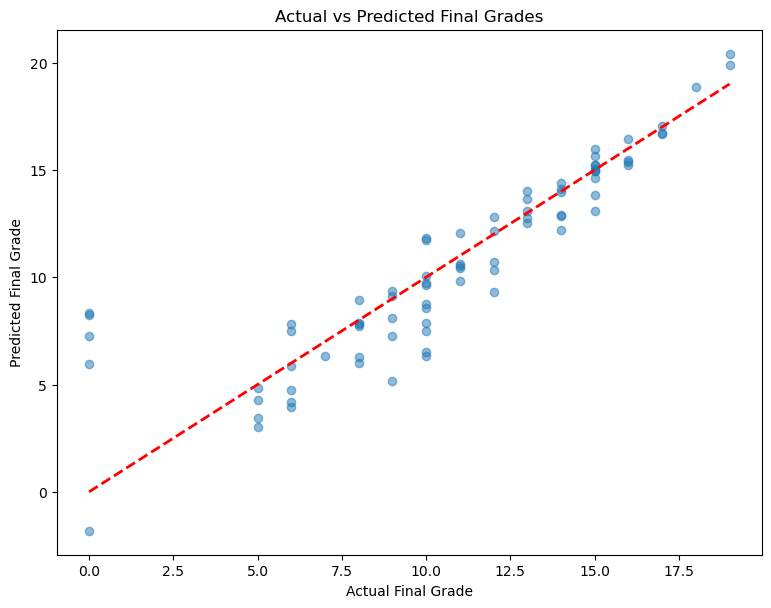

In [73]:
plt.figure(figsize=(20, 15))

# 1. Actual vs Predicted Plot
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Final Grade')
plt.ylabel('Predicted Final Grade')
plt.title('Actual vs Predicted Final Grades')

Text(0.5, 0, 'Coefficient Value')

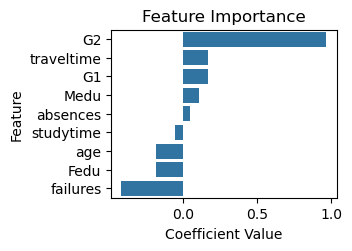

In [75]:
# Feature Importancr
plt.subplot(2, 2, 2)
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Importance')
plt.xlabel('Coefficient Valve')


Text(0.5, 1.0, 'Correlation Heatmap')

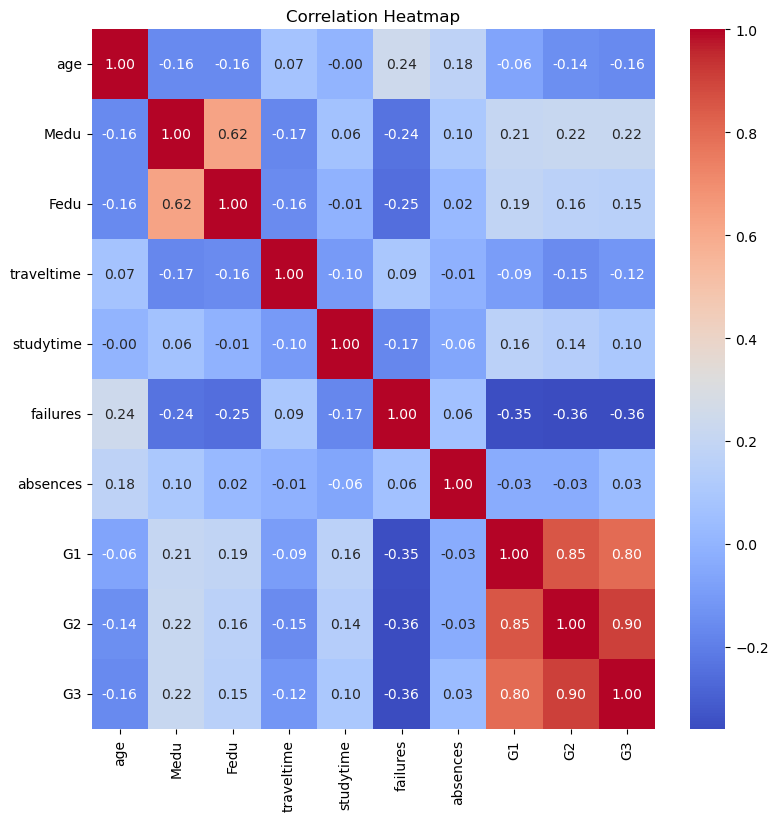

In [117]:
# 3. Correlation 
plt.figure(figsize=(20, 20))
plt.subplot(2, 2, 3)
correlation_matrix = df[numerical_features + ['G3']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

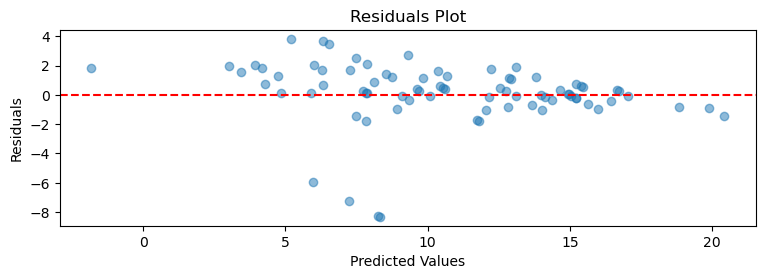

In [119]:
# 4. Residuals Plot
plt.figure(figsize=(15, 5))
residuals = y_test - y_pred
plt.subplot(2, 2, 4)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')

plt.tight_layout()
plt.show()


In [121]:
# Print descriptive statistics
print("\n=== Descriptive Statistics ===")
print(df[numerical_features + ['G3']].describe())

# Print correlation with final grade
print("\n=== Correlation with Final Grade (G3) ===")
correlations = df[numerical_features].corrwith(df['G3']).sort_values(ascending=False)
print(correlations)




=== Descriptive Statistics ===
              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

         absences          G1          G2          G3  
count  395.000000  395.000000  395.000000  395.000000  
mean     5.708861   10.908861   10.713924   10.415190  
std      8.003096    3.319195    3.761505    4.581443  
min      0.000